
## Normality defined

Data is described as *normal*, or *normally distributed*, if most values cluster in the center of the range, with the rest tapering off symmetrically to the left and the right. The mean and median of a normally distributed variable are equal. The information in a normal distribution can be summarized by the mean μ (mu) and standard deviation σ (sigma). The probability density function for a normally distributed variable is as follows:

\begin{equation}
f(x|\mu,\sigma^2)=\frac1{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation} 

Here, $e$ is [Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant), a mathematical constant. It has a value of about 2.71828.

Although you don't need to memorize the probability density function to work with normally distributed variables, it's good to be able to recognize this function if you come across it while reading about other statistical concepts.

The normal distribution is useful for data scientists because of the following reasons:

 * It is easily summarized using just two statistics (mean and standard deviation).
 * The area under the curve is 1 (like 100%), making it easy to calculate the probability of individual outcomes within the distribution.
 * It describes many natural phenomena, such as blood pressure, height, and weight.
 * In general, any variable that measures an outcome produced by many small effects acting additively and independently will have a close-to-normal distribution.
 * Lots of common scores (like z-scores) and statistical tests (like t-tests, ANOVAs, bell-curve grading) assume a normal distribution.

You can use Python to generate a normally distributed variable by providing a mean and standard deviation, which you graph as a histogram.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

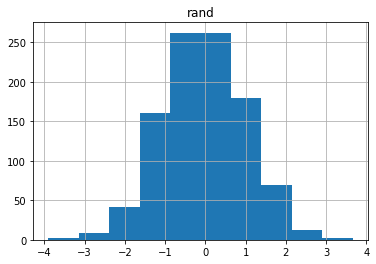

In [2]:
# Making a standard normally distributed variable with 1000 observations, a mean of 0, and 
# a standard deviation of 1, and putting it in a DataFrame.
mean = 0 
sd = 1
n = 1000

# Create a DataFrame of one column, `rand`,
# containing random numbers following normal 
# distribution

df = pd.DataFrame({'rand': np.random.normal(mean, sd, n)})

# Plotting the variables in the DataFrame (here, just the variable `rand`) as a histogram
df.hist()
# Inline printing the histogram
plt.show()

Approximately 68% of the values in a normally distributed variable fall within one standard deviation above or below the mean, 95% of values fall within two standard deviations of the mean, and 99.7% of values fall within three standard deviations of the mean. This is called the *empirical rule* of statistics.


## When does it break? Deviations from normality and descriptive statistics

Unfortunately, the usefulness of the normal distribution means that it often becomes the default distribution in people's minds. This isn't helped by the fact that it is called *normal*!  Real data (as opposed to idealized mathematical concepts) is never perfectly normal, but some data is more normal than others. When statistics that assume normality are used on non-normal data, the mismatch between statistics and data can result in inaccurate conclusions.

Although there are statistical tests of non-normality, they are sensitive to sample size, meaning that whether or not the test says that your data is normal has more to do with how much data you have than the distribution of your data. Instead, the best method of deciding if your data is normal is to visually inspect the data using histograms and quantile-quantile (QQ) plots.

QQ plots graph a variable with an unknown distribution against a variable with a known distribution. Values for each variable are sorted into ascending order, then plotted against each other, with the known variable as the x-axis and the unknown variable as the y-axis. If the mystery variable shares the same distribution as the known variable, the result should be a straight line running from the plot's bottom-left corner to its top-right corner. Deviations from the straight line indicate that the data doesn't fit the distribution. 

Now, try a QQ plot to check if data is normally distributed:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Making two variables
rand1 = np.random.normal(50, 300, 1000)
rand2 = np.random.poisson(1, 1000)

# Sorting the values in ascending order.
rand1.sort()
rand2.sort()

# Making a standard normally distributed variable with 1,000 observations,
# a mean of 0, and standard deviation of 1 that you will use as a comparison
norm = np.random.normal(0, 1, 1000)

# Sorting the values in ascending order
norm.sort()

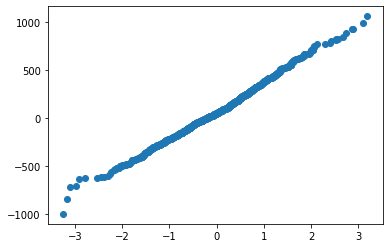

In [5]:
# Plotting the variable `rand1` against `norm` in QQ plots
plt.plot(norm, rand1, "o") 
plt.show() 

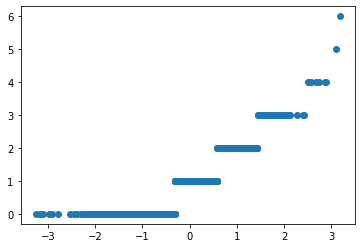

In [6]:
# Plotting the variable `rand2` against `norm` in QQ plots
plt.plot(norm, rand2, "o") 
plt.show()

From looking at the QQ plot, it is clear that the values of `rand1` are normally distributed, while the values of `rand2` are not normally distributed. (In fact, `rand2` reflects a different probability distribution, *Poisson*, which will be discussed in a later lesson.) 

You may notice that with a QQ plot, the scales of the known and unknown variables do not have to match. What matters is the relationships between data points within each variable. 

When data isn't normal, the mean and standard deviation are no longer accurate or informative summaries. Now, make histograms of `rand1` and `rand2`, then compute descriptive statistics to see how well they match up.

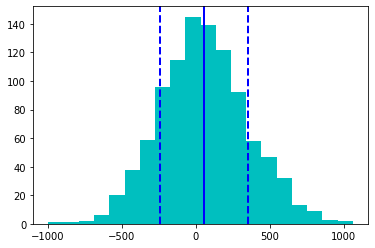

In [7]:
# Plot a histogram for `rand1`
plt.hist(rand1, bins=20, color='c')

# Add a vertical line at the mean
plt.axvline(rand1.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean
plt.axvline(rand1.mean() + rand1.std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean
plt.axvline(rand1.mean()-rand1.std(), color='b', linestyle='dashed', linewidth=2) 

# Print the histogram
plt.show()

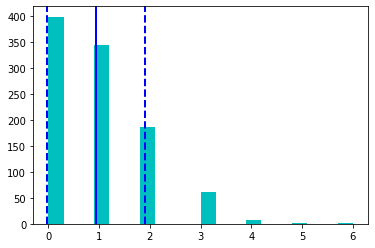

In [8]:
# Plot the same histogram for `rand2`
plt.hist(rand2, bins=20, color = 'c')

# Add a vertical line at the mean
plt.axvline(rand2.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean
plt.axvline(rand2.mean() + rand2.std(), color='b', linestyle='dashed', linewidth=2)

#Add a vertical line at one standard deviation below the mean
plt.axvline(rand2.mean() - rand2.std(), color='b', linestyle='dashed', linewidth=2)

# Print the histogram
plt.show()

Because `rand1` is normal, the mean is placed where the data clusters, with approximately 50% of the data falling on either side, and approximately 67% of the data falling within one standard deviation of the mean. For `rand2`, the mean is still placed where the data clusters, but the cluster is not centered, and the standard deviation does not encompass the same amount of data on each side of the mean. Put another way, for `rand2`, the mean is no longer a measure of *central* tendency, because it does not fall in the center, and the standard deviation no longer describes the concentration of probabilities around the mean. The empirical rule relating the standard deviations to the concentration of probability around the mean of a normal distribution does not work well when applied to non-normal distributions. Asymmetric probability distributions are described as *skewed*.

## Other distributions

So far, you've categorized data as either normal or non-normal, but there are many other probability distributions that also have useful characteristics for addressing particular statistical problems. You won't explore all of them in this lesson (see here for a [more comprehensive list](https://www.causascientia.org/math_stat/Dists/Compendium.pdf)), but here are brief introductions to some of the most common probability distributions.

### Bernoulli

The *Bernoulli distribution* represents two possible outcomes of an event (such as a coin flip or pass-fail). It's summarized by $p$, the probability of the outcome $k$.

This distribution can be understood with a probability mass function, to show the possible probabilities of the two randomly independent outcomes. The probability mass function consists of *discrete random variables*, which means that Bernoulli has a countable number of possible values. In this case, there are two possible values. The probability of each value is also between `0` and `1`, and the sum of all the probabilities is equal to `1`.

The probability mass function for the Bernoulli distribution is as follows:


\begin{equation}
  f(k|p)=\left\{
  \begin{array}{@{}ll@{}}
    p, & \text{if}\ k=1 \\
    1-p, & \text{if}\ k=0
  \end{array}\right.
\end{equation} 


Note that when a distribution is discrete (only takes integers), it has a probability _mass_ function, while a continuous distribution has a probability _density_ function.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

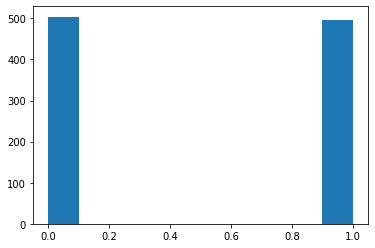

In [10]:
# Generate a Bernoulli distribution with p = 0.5
bernoulli= np.random.binomial(1, .5, 1000)

# Plot a histogram
plt.hist(bernoulli)

# Print the histogram
plt.show()

You can see that after 1,000 times, the distribution models the probabilities set at `0.5`.

### Binomial
A *binomial distribution* counts the number of successes when an event with two or more distinct possible outcomes is repeated many times (such as many coin flips or die tosses). This is called *Bernoulli trials*, because you are repeating this independent Bernoulli experiment over and over again. It's summarized by $p$, the probability of getting $k$ successes during $n$ repetitions of the event. 

The probability mass function is as follows:

\begin{equation}
f(k| n,p)= \left(
  \begin{array}{@{}ll@{}}
    n \\
    k
  \end{array}\right) p^k (1-p)^{(n-k)}
\end{equation}

This distribution describes the behavior of $n$ random experiments, each having a Bernoulli distribution with probability $p$.

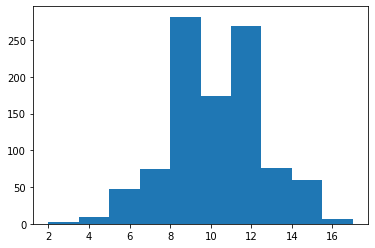

In [11]:
# Generate a binomial distribution with n=20 and p=0.5
binomial = np.random.binomial(20, 0.5, 1000)

# Plot a histogram
plt.hist(binomial)

# Print the histogram
plt.show()

### Gamma
The *gamma distribution* represents the time until an event (such as lifespan until death), when the event starts out unlikely (few people die in youth), becomes more likely (more people die in old age), and then becomes less likely again (few people die in extreme old age because most have already died). It's summarized by a shape parameter ($\alpha$) and an inverse-scale parameter ($\beta$). The probability density function is as follows:

\begin{equation}
f(x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}} {\Gamma(\alpha)} \text {for } x \ge 0 \text { and } \alpha,\beta \ge0
\end{equation} 

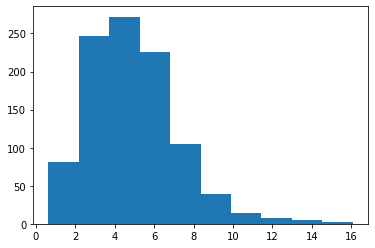

In [12]:
# Generate a gamma distribution with shape = 5 and scale = 1
gamma = np.random.gamma(5,1, 1000)

# Plot a histogram.
plt.hist(gamma)

# Print the histogram.
plt.show()

### Poisson

The *Poisson distribution* represents the number of times that a given event (such as a phone call to a radio show) will occur during a given time interval. Data can range from `0` (no phone calls during the time period) to approaching infinity (the phone never stopped ringing during the time period). It's summarized by $\lambda$ (lambda), the rate that events occur during a given time period. The probability mass function is as follows:

\begin{equation}
f(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
\end{equation} 



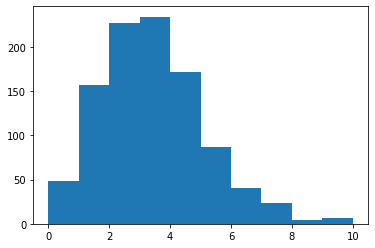

In [13]:
# Generate a Poisson distribution with lambda = 3
poisson = np.random.poisson(3, 1000)

# Plot a histogram
plt.hist(poisson)

# Print the histogram
plt.show()

Identifying whether data has a distribution with known statistical properties requires visualizing the data through histograms and QQ plots, as well as knowing the source of the data (counts, probabilities, times, and so forth). When collecting and exploring new data as a data scientist, you'll make heavy use of visualizations like the ones used above.

## Conditional distribution

Distributions can also be conditional. Consider an e-commerce site. For all of the customers, you  have a distribution of the amount of money that they have spent on the website. It may look something like this:

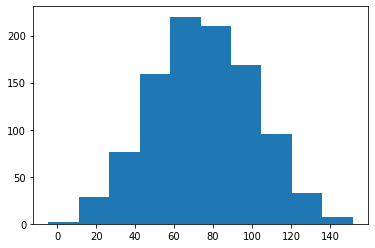

In [14]:
# Creating a DataFrame to hold the simulated e-commerce data, and populating it with a
# normally distributed variable with a mean of 75 and a standard deviation of 25.

ecommerce = pd.DataFrame()
ecommerce['spending'] = np.random.normal(75, 25, 1000)

# Plot a histogram
plt.hist(ecommerce['spending'])
plt.show()

But imagine that you're actually interested in a subset of that population. For example, perhaps you want to focus on visitors who visited the site more than twice. That data may look like this:


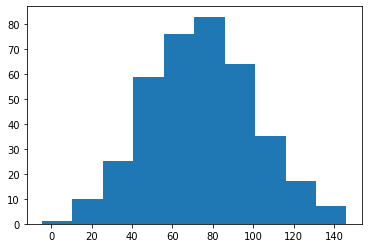

In [15]:
# Adding a variable with counts of the number of times visiting the site
ecommerce['visit_count'] = np.random.randint(0, 5, 1000)

# Selecting only the cases where the visit count is greater than two and plotting those
plt.hist(ecommerce[ecommerce['visit_count'] > 2]['spending'])
plt.show()

This is a *conditional distribution*, with the condition being that the user visited more than twice. This is an example of how you can use information about one aspect of a dataset to inform another. To see another example, check out [this xkcd comic](http://xkcd.com/795/).